# Non-parametric methods
## k-Nearest Neighbours (kNN)
- Arguably the simplest machine learning algorithm
    - Model only consists of storing training data set without learning a function from the dataset
    - And make prediction for new data by finding the nearest neighbour
- Non-parametric method
    - No assume a fixed model structure
    - Model size grows with the training set
    - Different from other (previously learnt) method, they have fixed structure, with parameters learnt and then no longer need the training data
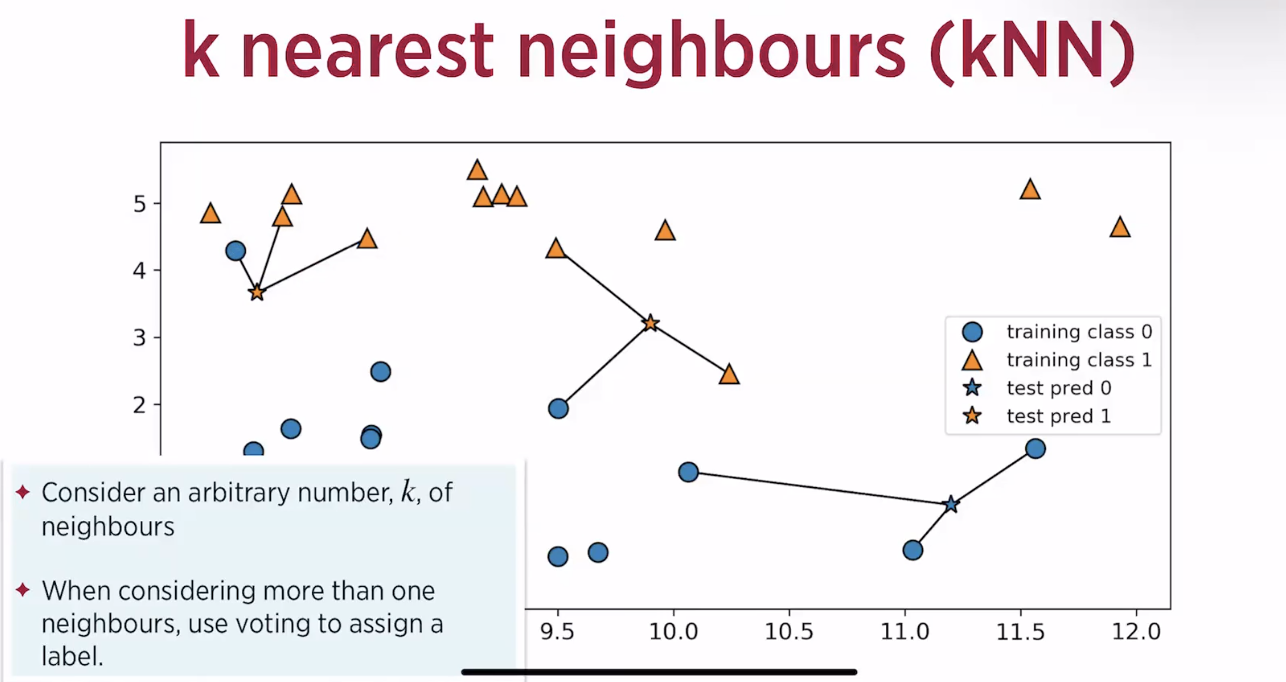

In [ ]:
# X_train, X_test, y_train, y_test from iris data
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
clf.predict(X_test)  

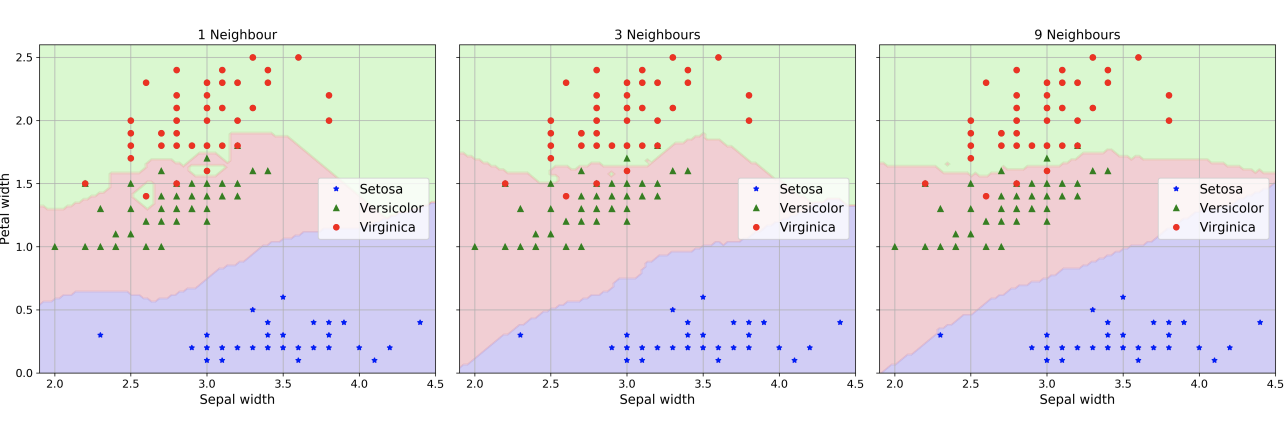
Using more neighbors leads to smoother decision boundary (simpler model - less complexity) and no more island part.
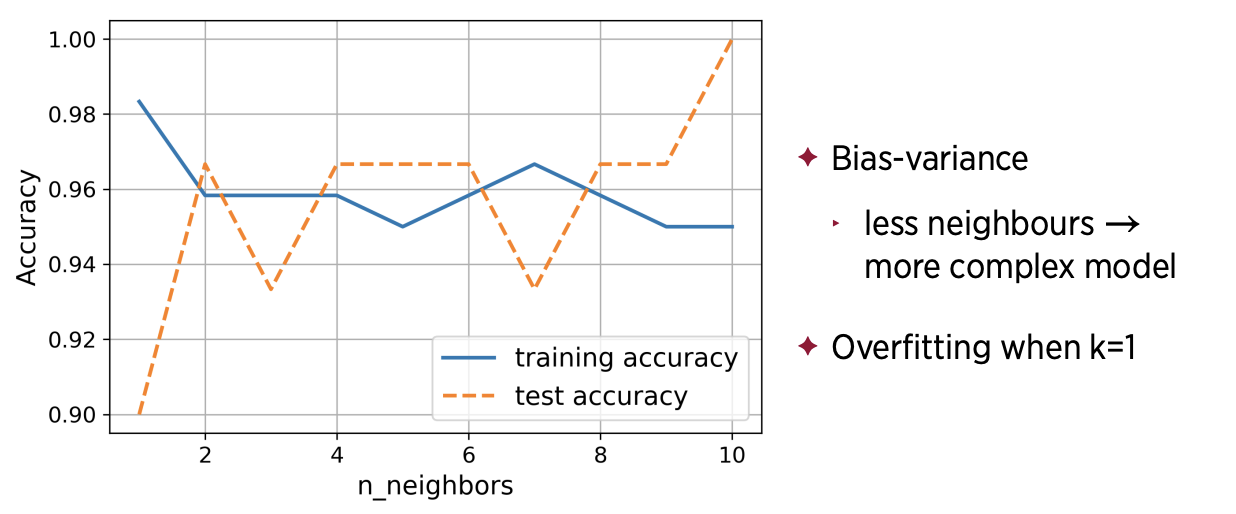
But when k comes to infinity, the values that are dominant will define everything (Underfiting)

## Distance measure
For distance $dist(X,Y)$ between two points:
- Distance must never be negative
- Distance to itself is zero
- Dist(A,B) = Dist(B,A)
- For any points A,B,Z: $dist(A,B) \leq dist(A,Z) + dist(Z,B)$ if Z is the same point as A or B or is on the direct routr between them.

With
- **Euclidean** (Most natural measure): $dist(A,B) = \sqrt{(a_1-b_1)^2 + (a_2-b_2)^2 + \dots + (a_n-b_n)^2}$
- Manhattan $dist(A,B) = |a_1-b_1| + |a_2-b_2| + \dots + |a_n-b_n|$
- Maximum dimension (Chebyshev) $dist(A,B) = max(|a_i-b_i|) for i = [1,2,...,n]$
- Mahalanobis $dist(A,B) = \sqrt{(A-B)^T S^{-1}(A-B)}$, where S is covariance matrix of distribution that A and B belong to

## Normalisation (min-max scaling)
If one feature has value range from [0,1000] and another has value range from [0,1], then the first feature will overwhelm the distance measure by one million to one.
- Normalisation from 0 to 1: $x_i^{'}=\frac{x_i-x_{min}}{x_{max}-x_{min}}$

## Importance of different attributes
Especially when k is even number
- Sometimes not all attribute are equal, some is not essential enough, some is more important
- So we add weights to the attributes
- **Euclidean** (Most natural measure): $dist(A,B) = \sqrt{w_1(a_1-b_1)^2 + w_2(a_2-b_2)^2 + \dots + w_n(a_n-b_n)^2}$
- It's customary to scale the weight values so that $\Sigma_iw_i =1$

## Categorical attributes
- There is no entirely satisfactory way to deal with categorical attributew
- One possibility is to say difference between any two identical values of the attribute is 0, and any different values is 1
- If there is some ordering to the values, then we could put values to them
- {good, average, bad} = {1, 0.5, 0}

## Distance can be misleading
- The distance measures should not be applied mechanically, ignoring specific aspects of the given domain
- {size, price, season}, but $x_1 = (2, 1.5, summer) , x_2 = (1, 0.5, winter)$

## Tomek Link
x and y forms a Tomek Link when:
- x is the NN of y
- y is the NN of x
- x and y have different classes
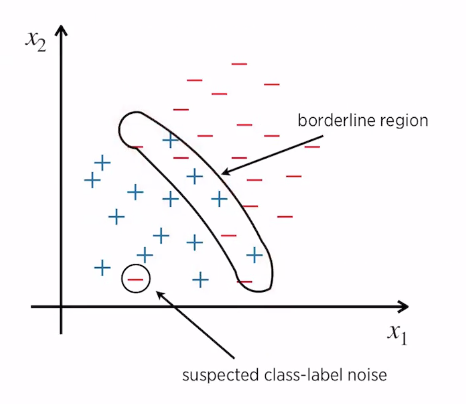

Advantages: can reduce the value of k once Tomek Links have been removed
- Can remove from training set all such pairs
- This process sometimes need to be repeated.

## Creating a consistent subset
- Let S (consistent subset) contains one example of each class from the training set, T
- Using examples from S, re-classify the examples in T with the 1-NN classifier. Let M be the set of those examples that have in this manner received the wrong class.
- Copy to S all examples from M
- If My is empty, then stop, otherwise, go to step 1

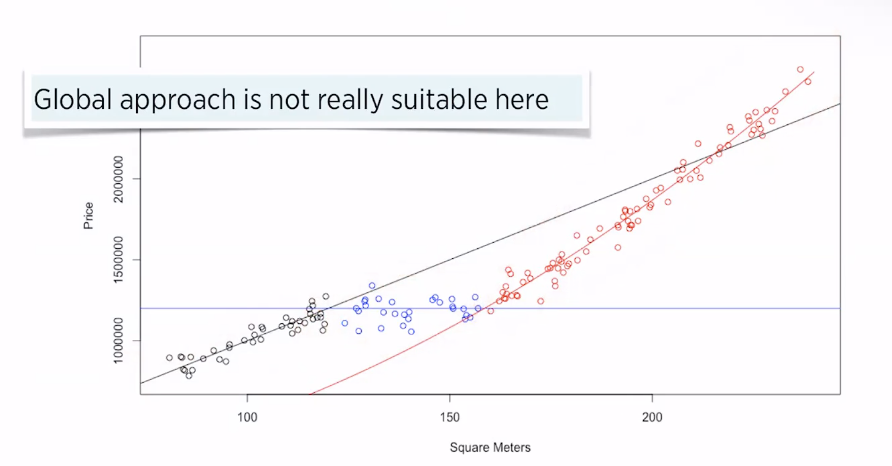
Normally, we need to use 3 lines to represent the model
- Use kNN instead

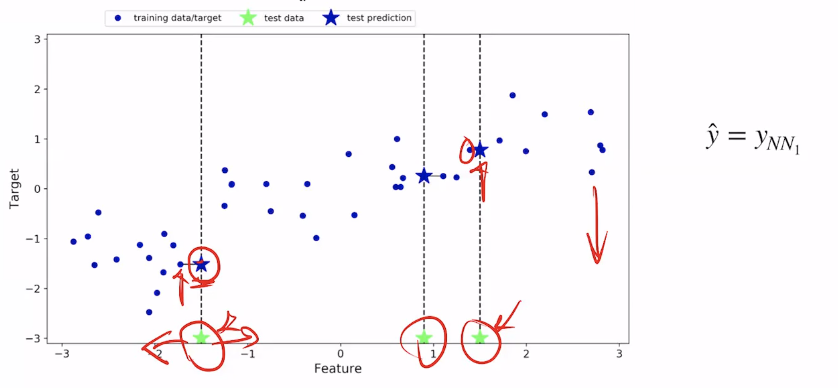
- 1-NN with 1 input
- Green stars are original data, without labels (no y)
- Have vertical axis up, see the closest points
- Match with y (target axis) of the closest point

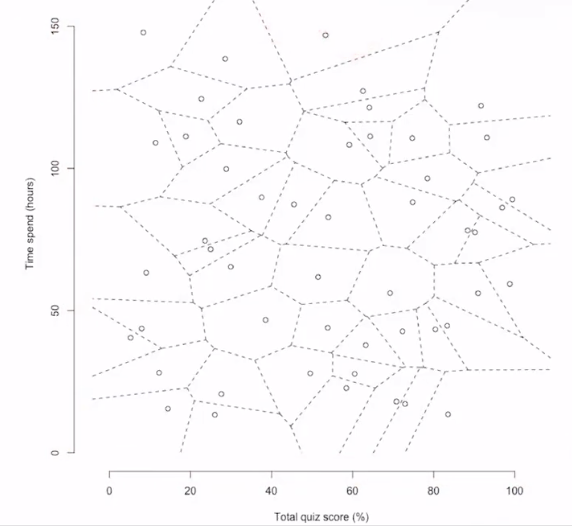
- 1-NN with 2 inputs
- Voronoi diagram - divides the space for each of the N data points
- Any point in a region is closest to the data point in that region (smallest distance)

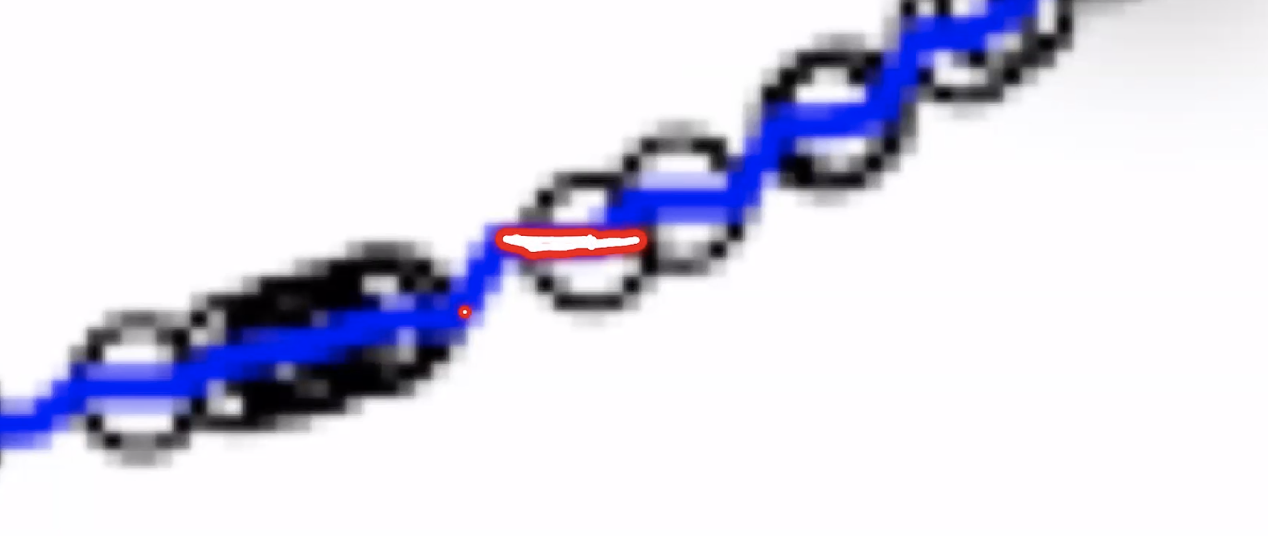
## Dense data
- Step in the dense data (this case is 1-NN)
- Dot is training set
- Line is testing data
- The step is result from the gap between them

## Noisy data
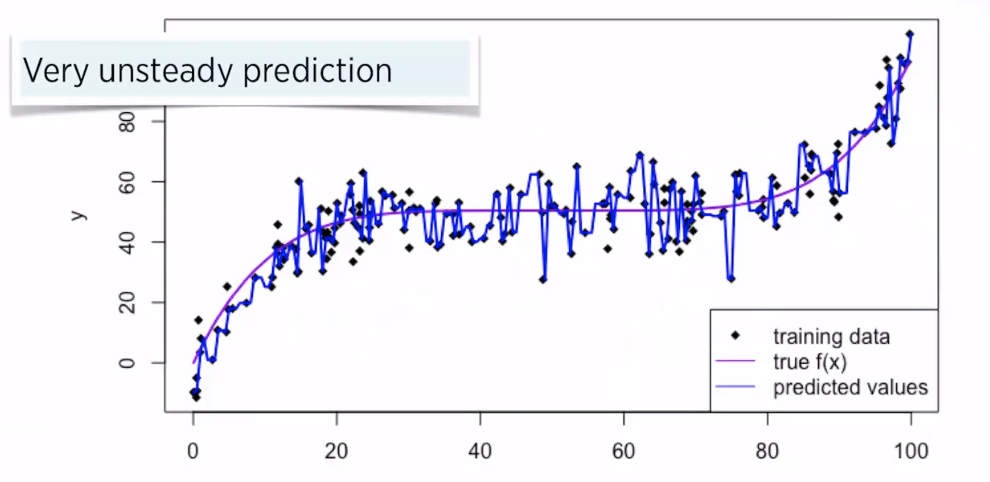
- Same pattern with above (Flat at some points because of 1-NN)

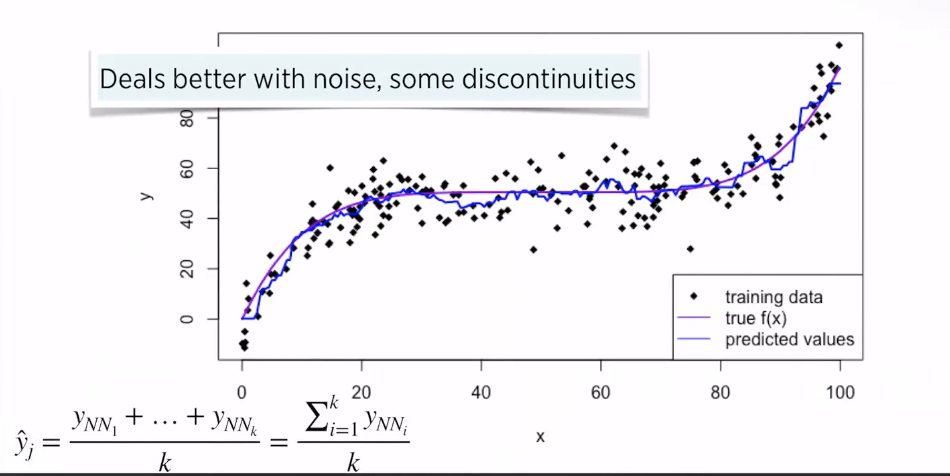
- kNN with noisy data and k = 9
- Deal with noise better
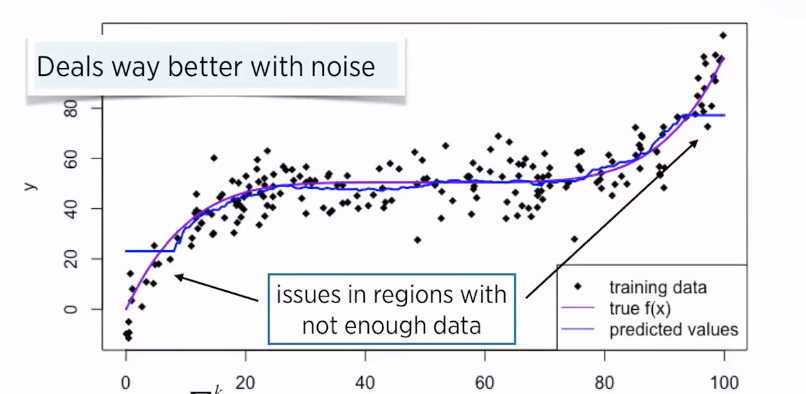
- k = 31 may lead to flat areas in 2 heads due to lack of data

## Setting the weights
- We want to set a weight $w_{\mathcal{N}_i}$ to be small when $distance(x_{\mathcal{N}_i},x)$ - the distance between query $x$ and its i-th nearest neighbour $x_{\mathcal{N}_i}$ is large.
- We want to set a weight $w_{\mathcal{N}_i}$ to be large when $distance(x_{\mathcal{N}_i},x)$ is small
- $w_{\mathcal{N}_i} = \frac{1}{distance(x_{\mathcal{N}_i},x)}$
- $x_{\mathcal{N}_i}$ is the i-th nearest neighbour, with i = 1,2,3,...

Then:
- $\hat{y} = \frac{w_{\mathcal{N}_1} y_{\mathcal{N}_1} + w_{\mathcal{N}_2} y_{\mathcal{N}_2} + \dots + w_{\mathcal{N}_k} y_{\mathcal{N}_k}}{w_{\mathcal{N}_1} + w_{\mathcal{N}_2} + w_{\mathcal{N}_k}} = \frac{\Sigma_{i=1}^k w_{\mathcal{N}_i} . y_{\mathcal{N}_i}}{\Sigma_{i=1}^k w_{\mathcal{N}_i}}$

## Kernel regression
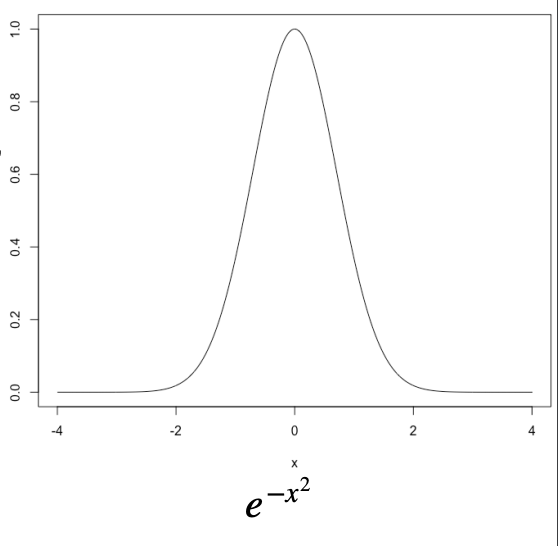
- The idea of using all points in the training set with appropriate weights
- Gaussian (popular measure) $k_h(x_i,x_j) = e^{h||x_i-x_j||^2}$, can use this as a weight function
- Other methods: Nadaraya-Watson

## Characteristics of nonparametric approaches
- k nearest neighbours (and kernel regression) are nonparametric approaches to regression.
- Characteristics of nonparametric approaches are
  - Their flexibility, and that they make only few assumptions about
  - Complexity of computation can grow with number of observations
- Basic kNN has no cost in training – the costs are all in the query, though

## Complexity of k nearest neighbours
- The naïve approach is to search through all $N$ data points
- For a single prediction of $x$: go through all data points
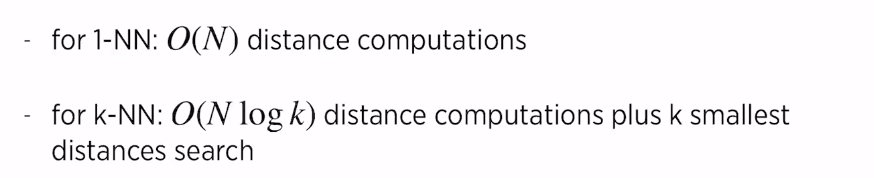